In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [56]:
start = '2010-01-01'
end   = '2022-04-30'

df = data.DataReader('TSLA', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [57]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-25,1008.619995,975.299988,978.969971,998.020020,22780400.0,998.020020
2022-04-26,1000.000000,875.000000,995.429993,876.419983,45377900.0,876.419983
2022-04-27,918.000000,877.359985,898.580017,881.510010,25652100.0,881.510010
2022-04-28,900.000000,821.700012,899.979980,877.510010,41649500.0,877.510010
2022-04-29,934.400024,870.000000,902.250000,870.760010,29313400.0,870.760010


In [58]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [59]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,5.000,3.508,3.800,4.778,93831500.0
1,6.084,4.660,5.158,4.766,85935500.0
2,5.184,4.054,5.000,4.392,41094000.0
3,4.620,3.742,4.600,3.840,25699000.0
4,4.000,3.166,4.000,3.222,34334500.0


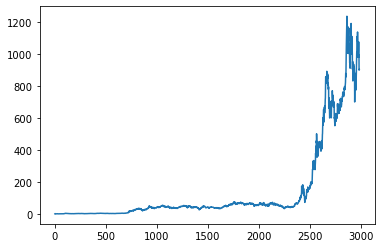

In [60]:
plt.plot(df.Open)

In [61]:
#Determining the moving average
mov_avg_100 = df.Open.rolling(100).mean()
mov_avg_100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2976    970.642199
2977    968.989500
2978    966.984699
2979    965.136599
2980    964.143998
Name: Open, Length: 2981, dtype: float64

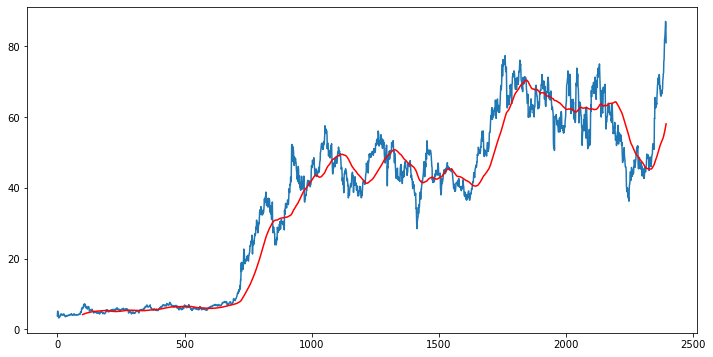

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Open)
plt.plot(mov_avg_100,'r')

In [62]:
mov_avg_200 = df.Open.rolling(200).mean()
mov_avg_200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2976    899.74775
2977    901.41390
2978    902.47520
2979    903.62135
2980    904.84065
Name: Open, Length: 2981, dtype: float64

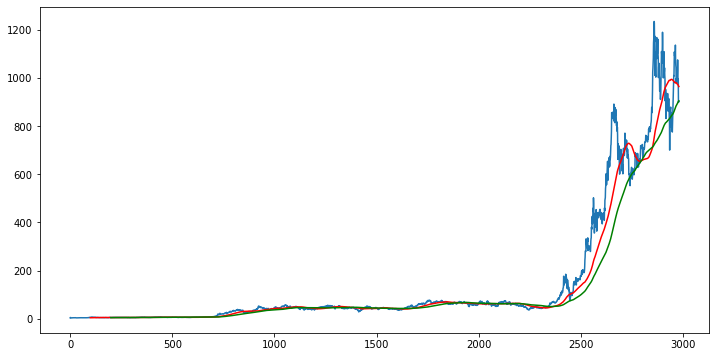

In [63]:
plt.figure(figsize = (12,6))
plt.plot(df.Open)
plt.plot(mov_avg_100,'r')
plt.plot(mov_avg_200,'g')

In [64]:
df.shape

(2981, 5)

In [65]:
#Splitiing data into training and testing

df_train = pd.DataFrame(df['Open'][0:int(len(df)*0.60)])
df_test = pd.DataFrame(df['Open'][int(len(df)*0.60): int(len(df))])
print(df_train.shape)
print(df_test.shape)
                    
                                   

(1788, 1)
(1193, 1)


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [67]:
df_train_array = scaler.fit_transform(df_train)
df_train_array 

array([[0.00771826],
       [0.02604237],
       [0.02391041],
       ...,
       [0.82812037],
       [0.81716368],
       [0.88838219]])

In [68]:
x_train = []
y_train = []

#Time series analysis analogy(Values depend upon the previous days values)
for i in range(100, df_train_array.shape[0]):
    x_train.append(df_train_array[i-100: i])
    y_train.append(df_train_array[i , 0])

x_train


[array([[0.00771826],
        [0.02604237],
        [0.02391041],
        [0.01851302],
        [0.01041695],
        [0.00070166],
        [0.        ],
        [0.00388612],
        [0.00488463],
        [0.00337336],
        [0.00485765],
        [0.01025503],
        [0.01230603],
        [0.01411416],
        [0.01540953],
        [0.01219808],
        [0.01176629],
        [0.01362839],
        [0.01446499],
        [0.01287276],
        [0.01190123],
        [0.01249494],
        [0.01095669],
        [0.01176629],
        [0.01311564],
        [0.0156794 ],
        [0.01457293],
        [0.01068682],
        [0.01014708],
        [0.00947241],
        [0.00688166],
        [0.00447983],
        [0.00550533],
        [0.00623398],
        [0.00761031],
        [0.00931049],
        [0.00647686],
        [0.00677372],
        [0.00796114],
        [0.00839293],
        [0.00815005],
        [0.01012009],
        [0.00974228],
        [0.00960734],
        [0.00949939],
        [0

In [69]:
x_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [70]:
x_train, y_train = np.array(x_train),np.array(y_train)

In [71]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [72]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
         input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))




model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [73]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
53/53 [==============================] - 3s 33ms/step - loss: 0.0425
Epoch 2/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0089
Epoch 3/50
53/53 [==============================] - 2s 31ms/step - loss: 0.0068
Epoch 4/50
53/53 [==============================] - 2s 31ms/step - loss: 0

In [74]:
model.save('keras_model.h5')

In [75]:
#Getting the values of the past 100 days for testing
past_100_days = df_train.tail(100)

In [76]:
final_df = past_100_days.append(df_test, ignore_index = True)

In [77]:
final_df.head()

,Open
0,49.222000
1,51.400002
2,52.480000
3,52.799999
4,52.119999


In [78]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01085137],
       [0.01266911],
       [0.01357047],
       ...,
       [0.7197189 ],
       [0.7208873 ],
       [0.72278184]])

In [79]:
input_data.shape

(1293, 1)

In [80]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [81]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1193, 100, 1)
(1193,)


In [82]:
#Prediction making

y_predict = model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [83]:
y_predict.shape

(1193, 1)

In [84]:
#Scaling them up and comparing

scaler.scale_

array([0.00083459])

In [85]:
scale_factor = 1/0.0170835
y_predict = y_predict *scale_factor
y_test = y_test * scale_factor

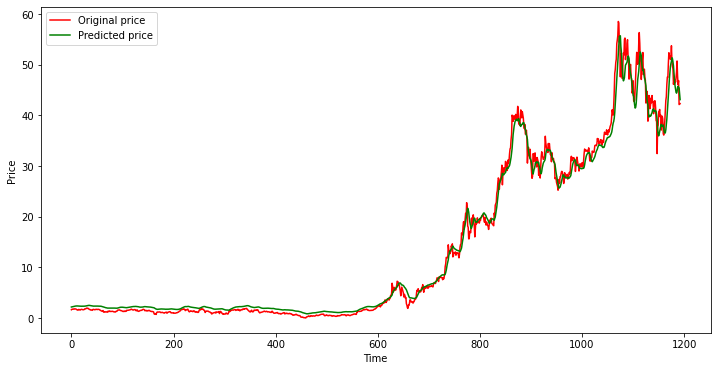

In [86]:
plt.figure(figsize =(12,6))
plt.plot(y_test, 'r', label = 'Original price')
plt.plot(y_predict, 'g', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

